## <div align="center"> Data Analysis </div>
---

In [1]:
import datetime
import uuid

Name = "Delista Dwi Widyastuti"

In [4]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(Name))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Delista Dwi Widyastuti
Start: 		2026-02-03 11:38:36.512848
Device ID: 	3436ef21-00ba-11f1-ac6a-38f3ab6d0ecd


## NOTE:
### The dataset used in this project was obtained from a public Kaggle dataset.
### The dataset is not included in this repository.

---

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('onsite-WorldUniversityRankings2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank                               2673 non-null   object 
 1   name                               2673 non-null   object 
 2   scores_overall                     1904 non-null   object 
 3   scores_overall_rank                2673 non-null   int64  
 4   scores_teaching                    1904 non-null   float64
 5   scores_teaching_rank               2673 non-null   int64  
 6   scores_research                    1904 non-null   float64
 7   scores_research_rank               2673 non-null   int64  
 8   scores_citations                   1904 non-null   float64
 9   scores_citations_rank              2673 non-null   int64  
 10  scores_industry_income             1904 non-null   float64
 11  scores_industry_income_rank        2673 non-null   int64

### a. Checking DataFrame Dimensions

In [357]:
df.shape

(2673, 29)

### b. Delete four columns

In [360]:
df = df.drop(columns=['closed', 'unaccredited', 'disabled', 'website_url'])
df

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,member_level,url,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered
0,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,0,/world-university-rankings/university-oxford,468,United Kingdom,"21,750",10.9,42%,49 : 51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo..."
1,2,Stanford University,98,20,99.0,1,97.8,8,99.6,2,...,0,/world-university-rankings/stanford-university,467,United States,"14,517",6.4,23%,47 : 53,Stanford University,"Computer Science,Communication & Media Studies..."
2,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,...,0,/world-university-rankings/massachusetts-insti...,471,United States,"11,085",8.0,33%,41 : 59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol..."
3,4,Harvard University,97.8,40,97.7,3,99.9,3,99.4,3,...,0,/world-university-rankings/harvard-university,466,United States,"20,050",9.0,25%,51 : 49,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy..."
4,5,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,12,...,0,/world-university-rankings/university-cambridge,470,United Kingdom,"20,565",11.5,38%,48 : 52,University of Cambridge,Politics & International Studies (incl Develop...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,Reporter,Zarqa University,NaN,1000765,NaN,0,NaN,0,NaN,0,...,0,/world-university-rankings/zarqa-university,698425,Jordan,"5,881",17.0,35%,60 : 40,Zarqa University,"General Engineering,Civil Engineering,Electric..."
2669,Reporter,Zhetysu University,NaN,1000766,NaN,0,NaN,0,NaN,0,...,0,/world-university-rankings/zhetysu-university,725647,Kazakhstan,"4,872",18.2,0%,66 : 34,Zhetysu University,"History, Philosophy & Theology,Psychology,Lang..."
2670,Reporter,Zhytomyr Polytechnic State University,NaN,1000767,NaN,0,NaN,0,NaN,0,...,0,/world-university-rankings/zhytomyr-polytechni...,719881,Ukraine,"4,454",16.1,1%,40 : 60,Zhytomyr Polytechnic State University,"Law,Economics & Econometrics,Politics & Intern..."
2671,Reporter,Ziane Achour University of Djelfa,NaN,1000768,NaN,0,NaN,0,NaN,0,...,0,/world-university-rankings/university-djelfa-0,709601,Algeria,"31,103",28.5,0%,55 : 45,Ziane Achour University of Djelfa,"Architecture,Agriculture & Forestry,Biological..."


### c. Convert "No of student" and "International Student" to Numeric Format

In [410]:
df['stats_number_students'] = df['stats_number_students'].astype(str)
df['stats_number_students'] = pd.to_numeric(df['stats_number_students'].str.replace(',', ''))

df['stats_pc_intl_students'] = df['stats_pc_intl_students'].astype(str)
df['stats_pc_intl_students'] = pd.to_numeric(df['stats_pc_intl_students'].str.rstrip('%'))
df['stats_pc_intl_students'] = df['stats_pc_intl_students'] * 100

df


,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,No of International Students,Z_Score_Students,International Percent Group
0,1.0,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,United Kingdom,21750,10.9,4200.0,49 : 51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",9135.00,-0.440985,NaN
1,2.0,Stanford University,98,20,99.0,1,97.8,8,99.6,2,...,United States,14517,6.4,2300.0,47 : 53,Stanford University,"Computer Science,Communication & Media Studies...",3338.91,-0.927244,NaN
2,3.0,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,...,United States,11085,8.0,3300.0,41 : 59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",3658.05,-1.157970,NaN
3,4.0,Harvard University,97.8,40,97.7,3,99.9,3,99.4,3,...,United States,20050,9.0,2500.0,51 : 49,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",5012.50,-0.555272,NaN
4,5.0,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,12,...,United Kingdom,20565,11.5,3800.0,48 : 52,University of Cambridge,Politics & International Studies (incl Develop...,7814.70,-0.520650,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,193.0,Ulm University,59,1970,40.6,292,41.2,233,87.9,156,...,Germany,10301,26.4,1300.0,51 : 49,Ulm University,"Other Health,Electrical & Electronic Engineeri...",1339.13,-1.210677,NaN
197,198.0,Indiana University,58.9,1980,47.3,171,38.4,273,84.9,212,...,United States,66389,12.3,1200.0,54 : 46,Indiana University,"Mechanical & Aerospace Engineering,Physics & A...",7966.68,2.560002,NaN
198,199.0,University of Notre Dame,58.7,1990,51.9,118,42.6,215,76.1,414,...,United States,12576,10.9,1200.0,47 : 53,University of Notre Dame,"Civil Engineering,Psychology,Biological Scienc...",1509.12,-1.057733,NaN
199,199.0,Queensland University of Technology,58.7,2000,33.9,498,42.1,225,89.5,133,...,Australia,35164,37.9,1400.0,54 : 46,Queensland University of Technology qut,"Other Health,Psychology,Art, Performing Arts &...",4922.96,0.460810,NaN


### d. Performing Basic Statistics with the describe() Function

In [413]:
df.describe()

,rank,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,scores_industry_income,scores_industry_income_rank,scores_international_outlook,scores_international_outlook_rank,member_level,nid,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,No of International Students,Z_Score_Students
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,2.010000e+02
mean,100.606965,1010.000000,57.778607,136.164179,61.058209,110.507463,87.694030,184.049751,87.400000,199.542289,77.352239,325.378109,2.009950,32276.378109,28309.547264,17.978607,2372.139303,6344.959005,1.193075e-16
std,57.857582,581.678605,16.174804,112.459406,16.919588,72.551094,9.629209,194.284939,12.882112,176.225990,16.500373,286.718636,4.063238,135491.613596,14911.917171,10.812460,1315.226178,4783.420284,1.002497e+00
min,1.000000,10.000000,32.100000,1.000000,35.000000,1.000000,33.900000,1.000000,34.900000,1.000000,32.900000,2.000000,0.000000,466.000000,614.000000,3.900000,400.000000,67.540000,-1.861913e+00
25%,51.000000,510.000000,46.500000,52.000000,47.400000,51.000000,83.700000,56.000000,76.400000,59.000000,65.200000,93.000000,0.000000,516.000000,18103.000000,11.100000,1400.000000,3041.500000,-6.861647e-01
50%,101.000000,1010.000000,53.500000,108.000000,56.700000,103.000000,89.700000,130.000000,92.000000,145.000000,80.100000,255.000000,0.000000,573.000000,26305.000000,14.800000,2200.000000,5085.400000,-1.347615e-01
75%,150.000000,1510.000000,66.200000,182.000000,72.800000,162.000000,94.300000,241.000000,99.500000,313.000000,92.500000,481.000000,0.000000,657.000000,35675.000000,20.500000,3100.000000,8151.550000,4.951639e-01
max,199.000000,2010.000000,99.000000,587.000000,100.000000,350.000000,99.700000,1352.000000,100.000000,1094.000000,98.700000,1389.000000,11.000000,699920.000000,79282.000000,58.500000,7200.000000,29281.140000,3.426771e+00


### e. Displaying the Data Type of Each Column

In [416]:
df.dtypes

rank                                  float64
name                                   object
scores_overall                         object
scores_overall_rank                     int64
scores_teaching                       float64
scores_teaching_rank                    int64
scores_research                       float64
scores_research_rank                    int64
scores_citations                      float64
scores_citations_rank                   int64
scores_industry_income                float64
scores_industry_income_rank             int64
scores_international_outlook          float64
scores_international_outlook_rank       int64
record_type                            object
member_level                            int64
url                                    object
nid                                     int64
location                               object
stats_number_students                   int64
stats_student_staff_ratio             float64
stats_pc_intl_students            

### f. Displaying the First 5 Rows and Last 5 Rows

#### First 5 lines

In [420]:
df.head(5)

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,No of International Students,Z_Score_Students,International Percent Group
0,1.0,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,5,...,United Kingdom,21750,10.9,4200.0,49 : 51,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",9135.00,-0.440985,NaN
1,2.0,Stanford University,98,20,99.0,1,97.8,8,99.6,2,...,United States,14517,6.4,2300.0,47 : 53,Stanford University,"Computer Science,Communication & Media Studies...",3338.91,-0.927244,NaN
2,3.0,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,1,...,United States,11085,8.0,3300.0,41 : 59,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",3658.05,-1.157970,NaN
3,4.0,Harvard University,97.8,40,97.7,3,99.9,3,99.4,3,...,United States,20050,9.0,2500.0,51 : 49,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",5012.50,-0.555272,NaN
4,5.0,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,12,...,United Kingdom,20565,11.5,3800.0,48 : 52,University of Cambridge,Politics & International Studies (incl Develop...,7814.70,-0.520650,NaN


#### 5 final lines

In [423]:
df.tail(5)

,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,aliases,subjects_offered,No of International Students,Z_Score_Students,International Percent Group
196,193.0,Ulm University,59,1970,40.6,292,41.2,233,87.9,156,...,Germany,10301,26.4,1300.0,51 : 49,Ulm University,"Other Health,Electrical & Electronic Engineeri...",1339.13,-1.210677,NaN
197,198.0,Indiana University,58.9,1980,47.3,171,38.4,273,84.9,212,...,United States,66389,12.3,1200.0,54 : 46,Indiana University,"Mechanical & Aerospace Engineering,Physics & A...",7966.68,2.560002,NaN
198,199.0,University of Notre Dame,58.7,1990,51.9,118,42.6,215,76.1,414,...,United States,12576,10.9,1200.0,47 : 53,University of Notre Dame,"Civil Engineering,Psychology,Biological Scienc...",1509.12,-1.057733,NaN
199,199.0,Queensland University of Technology,58.7,2000,33.9,498,42.1,225,89.5,133,...,Australia,35164,37.9,1400.0,54 : 46,Queensland University of Technology qut,"Other Health,Psychology,Art, Performing Arts &...",4922.96,0.460810,NaN
200,199.0,Ulsan National Institute of Science and Techno...,58.7,2010,47.7,164,40.8,238,85.0,210,...,South Korea,3799,11.8,900.0,28 : 72,Ulsan National Institute of Science and Techno...,"General Engineering,Physics & Astronomy,Biolog...",341.91,-1.647793,NaN


### 1. Data Formatting: Creating a New Column "No of International Students"

In [427]:
df['No of International Students'] = df['stats_number_students'] * df['stats_pc_intl_students']
df[['name','stats_number_students', 'stats_pc_intl_students', 'No of International Students']].head()


,name,stats_number_students,stats_pc_intl_students,No of International Students
0,University of Oxford,21750,4200.0,91350000.0
1,Stanford University,14517,2300.0,33389100.0
2,Massachusetts Institute of Technology,11085,3300.0,36580500.0
3,Harvard University,20050,2500.0,50125000.0
4,University of Cambridge,20565,3800.0,78147000.0


### 2. Data Visualization

#### a. Comparing the Number of International Students with a Boxplot

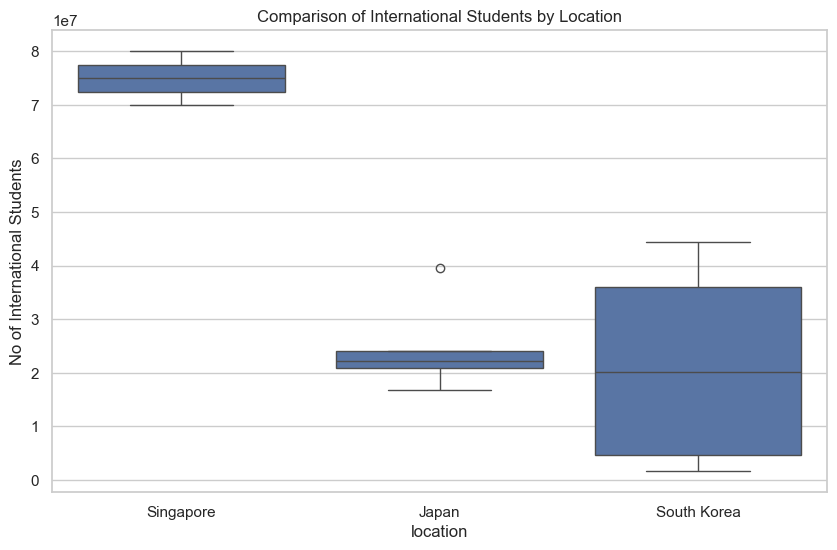

In [431]:
df_filtered = df[df['location'].isin(['Malaysia', 'Indonesia', 'Singapore', 'South Korea', 'Japan'])]

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='No of International Students', data=df_filtered)
plt.title('Comparison of International Students by Location')
plt.show()


#### b. Creating a Histogram for the Number of Students with a Maximum of 100,000

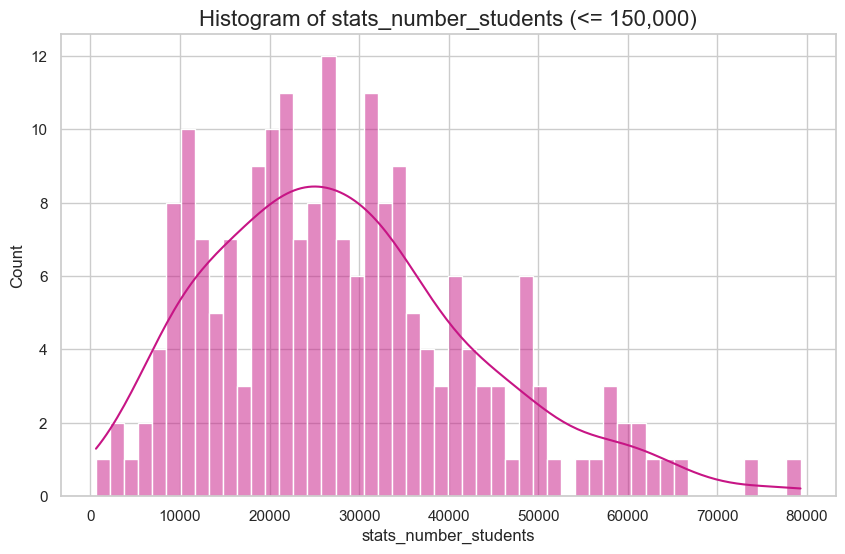

In [434]:
filtered_students = df[df['stats_number_students'] <= 150000]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_students['stats_number_students'],kde=True, bins=50, color='mediumvioletred')
plt.title('Histogram of stats_number_students (<= 150,000)', fontsize=16)
plt.xlabel('stats_number_students', fontsize=12)
plt.ylabel('Count', fontsize=12) 
plt.show()


#### c. Bar Chart for Overall Score of Universities in UK

C:\Users\DELISTA\AppData\Local\Temp\ipykernel_4276\324515259.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\DELISTA\AppData\Local\Temp\ipykernel_4276\324515259.py:9: UserWarning: The palette list has more values (36) than needed (35), which may not be intended.
  sns.barplot(


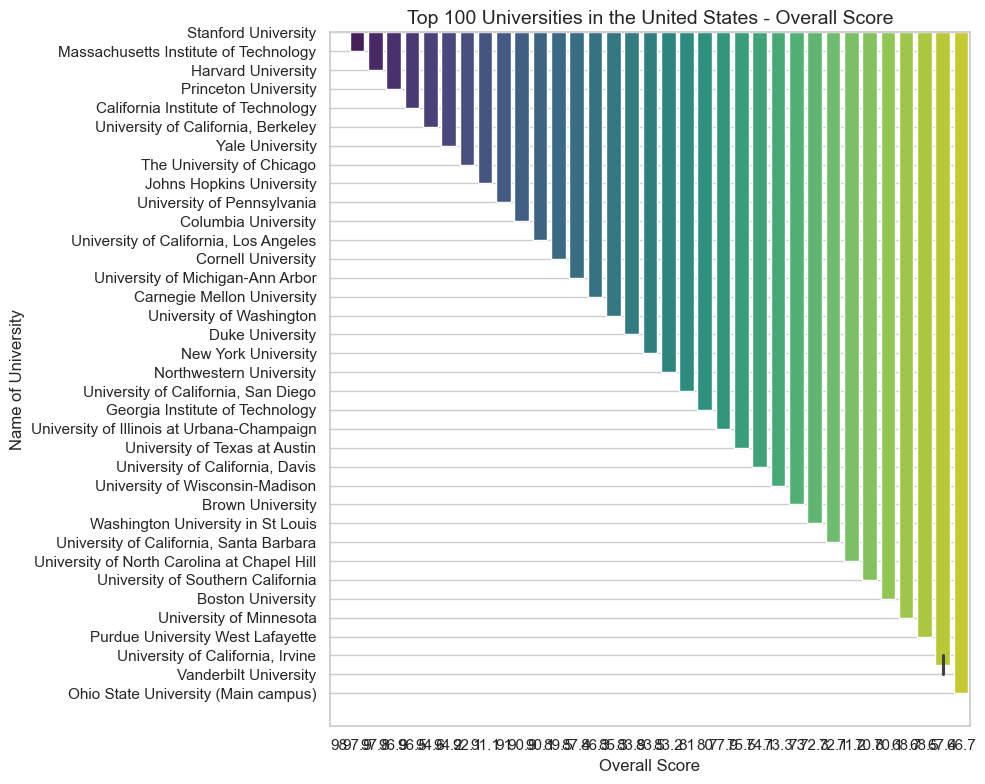

In [437]:
df['rank'] = pd.to_numeric(df['rank'], errors='coerce')
df = df.dropna(subset=['rank'])
us_universities = df[(df['location'] == 'United States') & (df['rank'] <= 100)]
sns.set(style="whitegrid")
color_palette = sns.color_palette("viridis", len(us_universities))
us_universities = us_universities.sort_values(by='scores_overall', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='scores_overall',
    y='name', 
    data=us_universities, 
    palette=color_palette
)
plt.title('Top 100 Universities in the United States - Overall Score', fontsize=14)
plt.xlabel('Overall Score', fontsize=12)
plt.ylabel('Name of University', fontsize=12)
plt.tight_layout()
plt.show()



## 3. Exploratory Data Analysis (EDA)

In [440]:
df['Z_Score_Students'] = stats.zscore(df['stats_number_students'].dropna())
outliers = df[df['stats_number_students'].abs() > 3]
outlier_percentage = (len(outliers) / len(df)) * 100
print(f'\nJumlah outliers: {len(outliers)}')
print(f'Persentase outliers: {outlier_percentage:.2f}%')


Jumlah outliers: 201
Persentase outliers: 100.00%


## 4. Data Preprocessing dan Preparation: Binning

In [455]:
range = [0, 25, 50, float('inf')]
category = ['Low', 'Medium', 'High']
df['International Percent Group'] = pd.cut(df['No of International Students'], bins=range, labels=category)
df[['name', 'stats_number_students', 'stats_pc_intl_students', 'International Percent Group']].head(10)


,name,stats_number_students,stats_pc_intl_students,International Percent Group
0,University of Oxford,21750,4200.0,High
1,Stanford University,14517,2300.0,High
2,Massachusetts Institute of Technology,11085,3300.0,High
3,Harvard University,20050,2500.0,High
4,University of Cambridge,20565,3800.0,High
5,Princeton University,7753,2300.0,High
6,California Institute of Technology,2240,3300.0,High
7,Imperial College London,20275,6100.0,High
8,"University of California, Berkeley",39991,2200.0,High
9,Yale University,11924,2100.0,High


----

----